This notebook is an exploration of two datasets regarding recent college graduates in the US. This visualization exploration covers the most used and important graphs analysts use since they are easy to convey information to technical and non-technical stakeholders.

Visualizations is an invaluable tool to better understand our data and help others understand our data as well.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

recent_grads = pd.read_csv("recent-grads.csv")
women_degrees = pd.read_csv("percent-bachelors-degrees-women-usa.csv")
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [2]:
recent_grads.info()
recent_grads.isnull().sum(axis=0)

#we see we have 4 columns with 1 null value 
#lets drop the values and check there is no null values
recent_grads = recent_grads.dropna()
recent_grads.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

Rank                    0
Major_code              0
Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

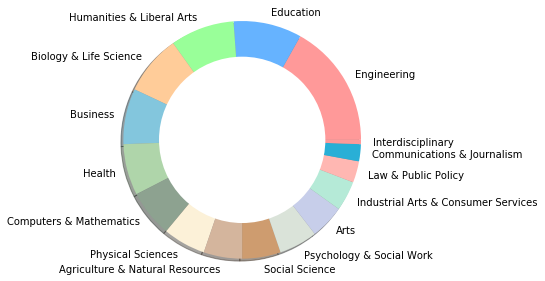

In [198]:
fig, ax = plt.subplots()

color = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#83C6DD','#AFD5AA', '#8DA290','#FCF1D8','#D4B59D','#CE9C6F','#DAE3D9',"#C7CEEA",'#B5EAD7','#FFB7B2','#29AFD6']
ax.pie(recent_grads["Major_category"].value_counts(), labels=recent_grads["Major_category"].value_counts().index, shadow=True, colors = color)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.tight_layout()
plt.show()

<h1> Scatter Plots </h1>

With pandas as opposed to matplotlib for fun

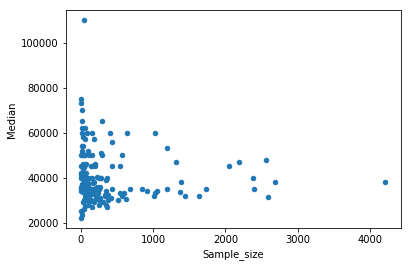

In [3]:
recent_grads.plot(kind="scatter", x="Sample_size", y="Median")

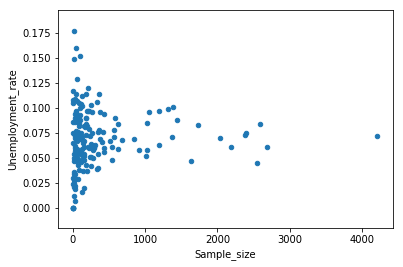

In [4]:
recent_grads.plot(kind="scatter", x="Sample_size", y="Unemployment_rate")

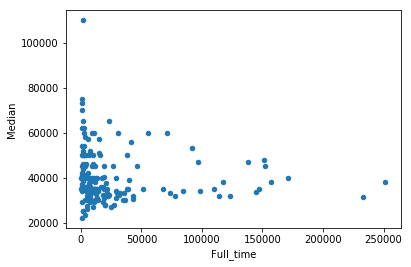

In [5]:
recent_grads.plot(kind="scatter", x="Full_time", y="Median")

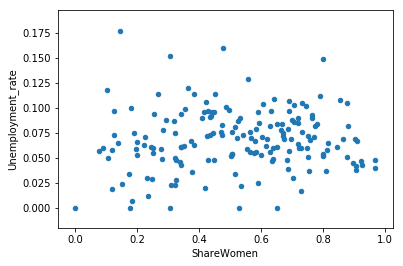

In [6]:
recent_grads.plot(kind="scatter", x="ShareWomen", y="Unemployment_rate")

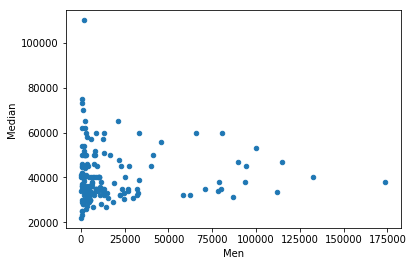

In [7]:
recent_grads.plot(kind="scatter", x="Men", y="Median")

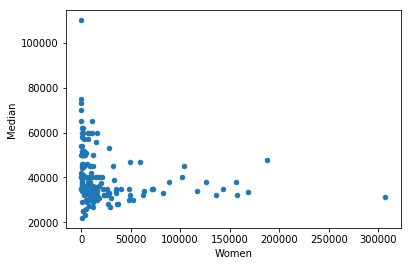

In [8]:
recent_grads.plot(kind="scatter", x="Women", y="Median")

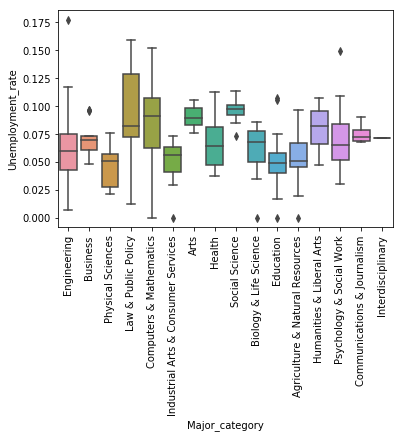

In [9]:
a = sns.boxplot(recent_grads["Major_category"], recent_grads["Unemployment_rate"])
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a

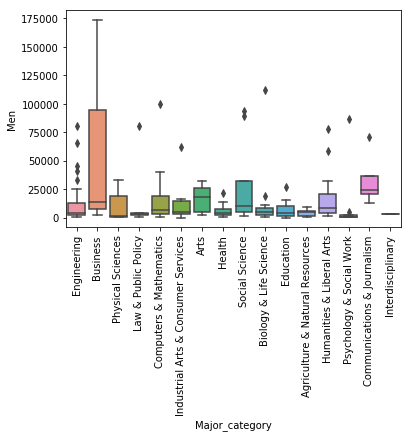

In [110]:
b = sns.boxplot(recent_grads["Major_category"], recent_grads["Men"])
b.set_xticklabels(b.get_xticklabels(), rotation=90)
b

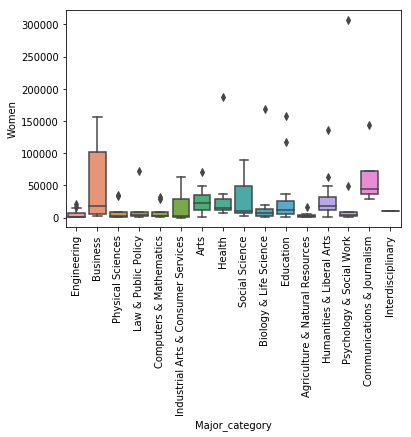

In [11]:
c = sns.boxplot(recent_grads["Major_category"], recent_grads["Women"])
c.set_xticklabels(b.get_xticklabels(), rotation=90)
c

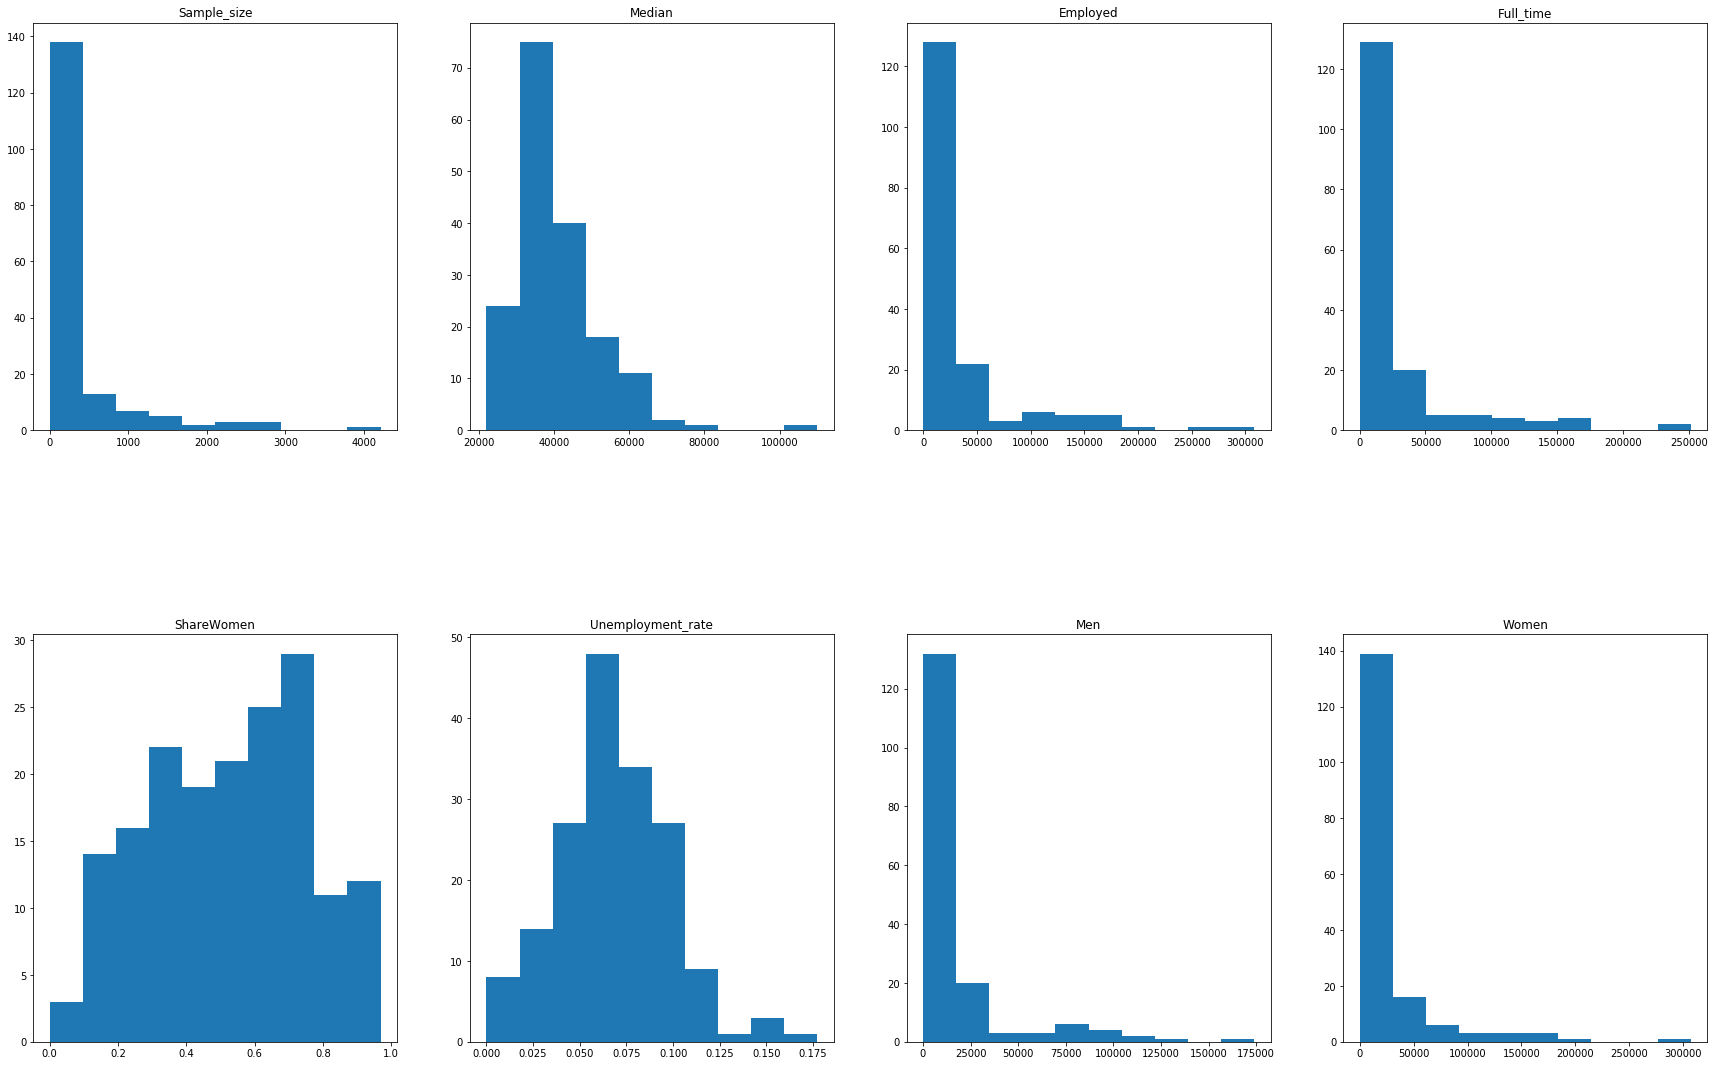

In [12]:
columns = ["Sample_size","Median","Employed","Full_time","ShareWomen","Unemployment_rate","Men",
                         "Women"]
fig = plt.figure(figsize=(30,30))
for i in range(len(columns)):
    #i = i+1
    ax = fig.add_subplot(3,4,(i+1))
    ax.hist(recent_grads[columns[i]])
    ax.set_title(str(columns[i]))
    fig.subplots_adjust(hspace=.5)

[Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'')]

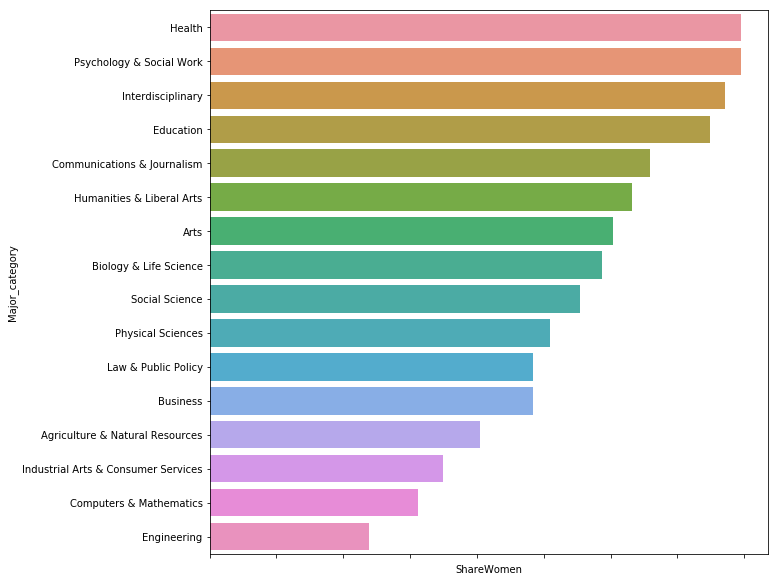

In [237]:
plt.figure(figsize=(10,10))
result = recent_grads.groupby(["Major_category"])["ShareWomen"].aggregate(np.mean).reset_index().sort_values("ShareWomen", ascending=False)

g = sns.barplot(x="ShareWomen", y="Major_category", data=recent_grads, order=result["Major_category"], ci=None)
g.set_xticklabels(g.get_xticklabels(), rotation=90,)


[Text(0,0,'Social Science'),
 Text(0,0,'Law & Public Policy'),
 Text(0,0,'Arts'),
 Text(0,0,'Computers & Mathematics'),
 Text(0,0,'Humanities & Liberal Arts'),
 Text(0,0,'Communications & Journalism'),
 Text(0,0,'Psychology & Social Work'),
 Text(0,0,'Business'),
 Text(0,0,'Interdisciplinary'),
 Text(0,0,'Health'),
 Text(0,0,'Engineering'),
 Text(0,0,'Biology & Life Science'),
 Text(0,0,'Agriculture & Natural Resources'),
 Text(0,0,'Education'),
 Text(0,0,'Industrial Arts & Consumer Services'),
 Text(0,0,'Physical Sciences')]

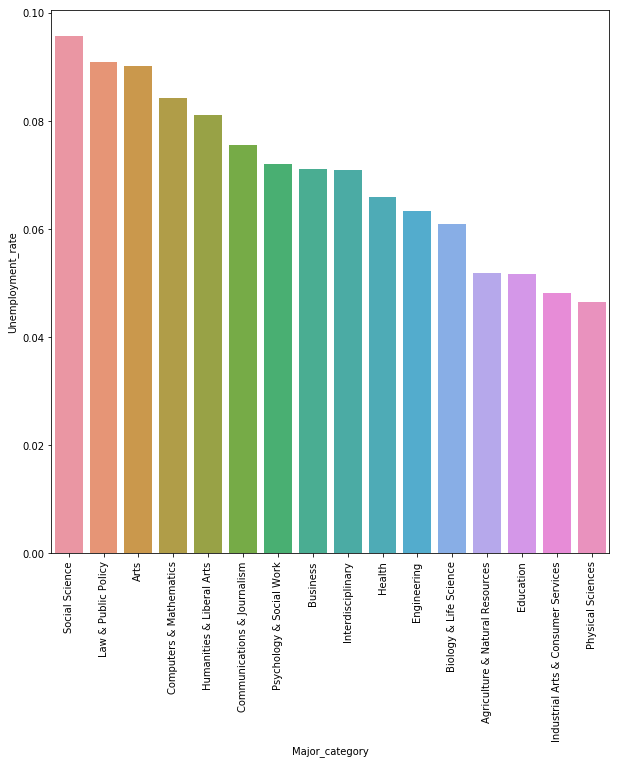

In [239]:
plt.figure(figsize=(10,10))
result = recent_grads.groupby(["Major_category"])["Unemployment_rate"].aggregate(np.mean).reset_index().sort_values("Unemployment_rate", ascending=False)
g = sns.barplot(x="Major_category", y="Unemployment_rate", data=recent_grads, order=result["Major_category"], ci=None)
g.set_xticklabels(g.get_xticklabels(), rotation=90,)

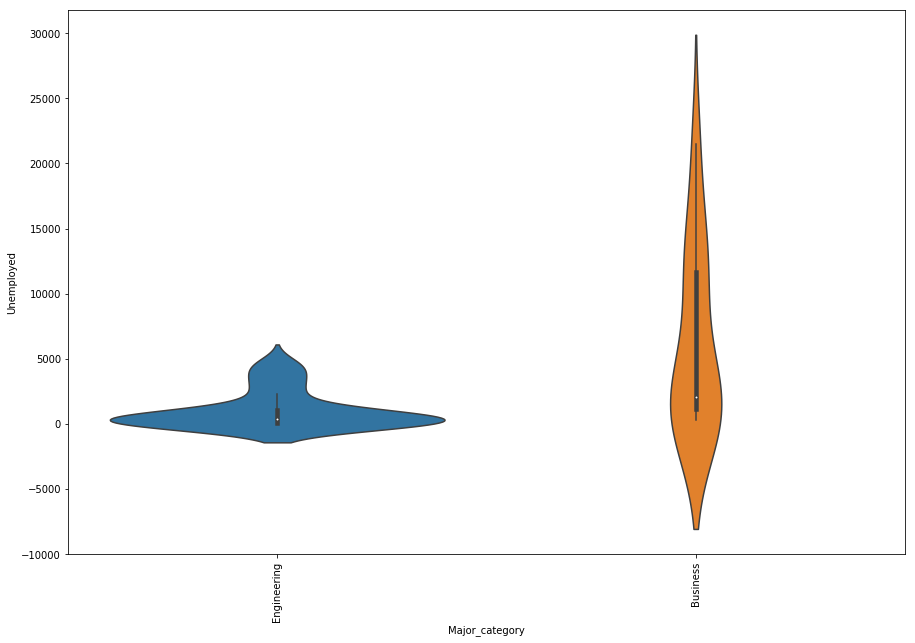

In [189]:


either = recent_grads[(recent_grads["Major_category"] == "Engineering") | (recent_grads["Major_category"] == "Business")]["Major_category"]
fig2, ax2 = plt.subplots(figsize=(15,10))
d = sns.violinplot(either, y="Unemployed", data=recent_grads)
d.set_xticklabels(d.get_xticklabels(), rotation=90)
d

In [16]:
women_degrees.describe()
women_degrees.info()
women_degrees.isnull().sum()
women_degrees.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
Year                             42 non-null int64
Agriculture                      42 non-null float64
Architecture                     42 non-null float64
Art and Performance              42 non-null float64
Biology                          42 non-null float64
Business                         42 non-null float64
Communications and Journalism    42 non-null float64
Computer Science                 42 non-null float64
Education                        42 non-null float64
Engineering                      42 non-null float64
English                          42 non-null float64
Foreign Languages                42 non-null float64
Health Professions               42 non-null float64
Math and Statistics              42 non-null float64
Physical Sciences                42 non-null float64
Psychology                       42 non-null float64
Public Administration            42 non-null float6

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


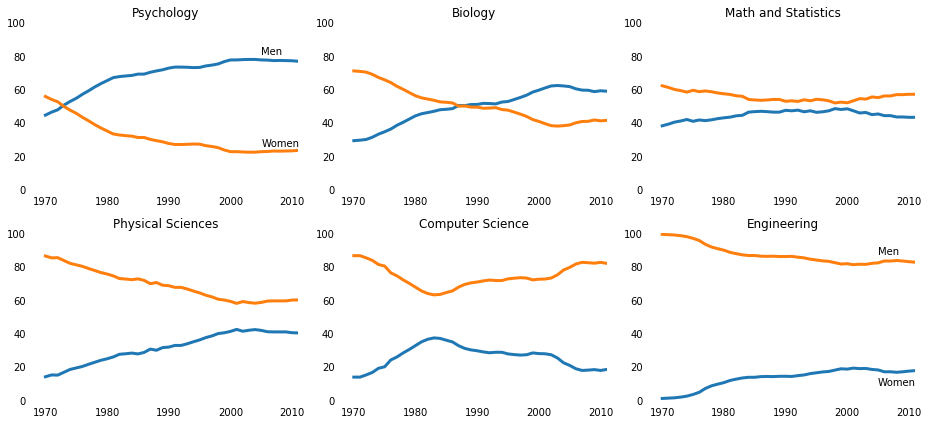

In [17]:
stem_degrees = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 
                'Engineering']

fig = plt.figure(figsize=(13,6))

for i in range(len(stem_degrees)):
    ax = fig.add_subplot(2,3,(i+1))
    ax.plot(women_degrees["Year"], women_degrees[stem_degrees[i]], label="Women", linewidth=3)
    ax.plot(women_degrees["Year"], 100-women_degrees[stem_degrees[i]], label="Men", linewidth=3)
    ax.set_title(stem_degrees[i])
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.tick_params(bottom=False, left=False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    fig.tight_layout()
    
   
    if i ==0:
        ax.text(2005, 81,"Men")
        ax.text(2005, 26, "Women")
    if i ==5:
        ax.text(2005, 87, "Men")
        ax.text(2005, 9, "Women")
            


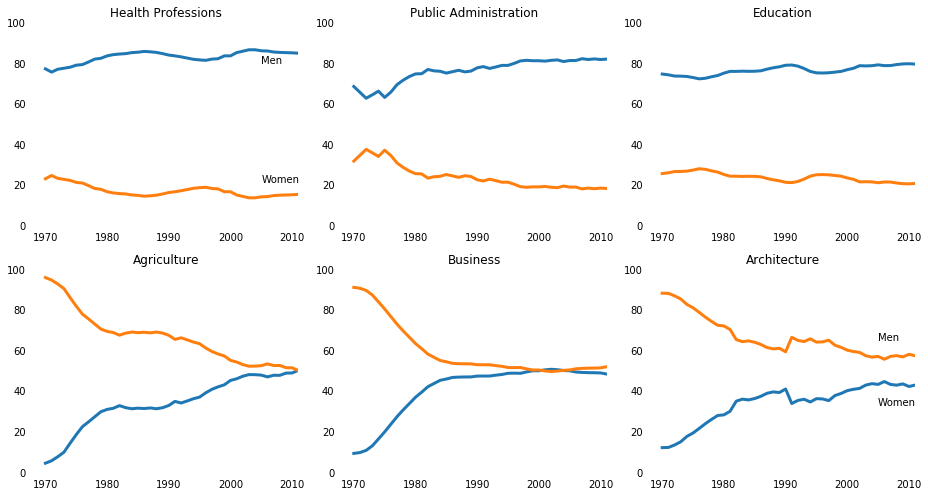

In [18]:
other_degrees = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

fig1 = plt.figure(figsize=(13,7))
for i in range(len(other_degrees)):
    ax1 = fig1.add_subplot(2,3,(i+1))
    ax1.plot(women_degrees["Year"], women_degrees[other_degrees[i]], label="Women", linewidth=3)
    ax1.plot(women_degrees["Year"], 100-women_degrees[other_degrees[i]], label="Men", linewidth=3)
    ax1.set_title(other_degrees[i])
    ax1.spines["right"].set_visible(False)
    ax1.spines["left"].set_visible(False)
    ax1.spines["bottom"].set_visible(False)
    ax1.spines["top"].set_visible(False)
    ax1.tick_params(bottom=False, left=False)
    ax1.set_xlim(1968, 2011)
    ax1.set_ylim(0, 100)
    fig1.tight_layout()
    

    if i ==0:
        ax1.text(2005, 80,"Men")
        ax1.text(2005, 21, "Women")
    if i ==5:
        ax1.text(2005, 65, "Men")
        ax1.text(2005, 33, "Women")
plt.show()

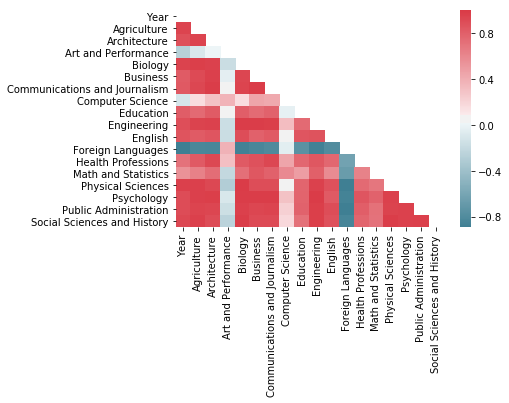

In [197]:
corr = women_degrees.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap)